In [ ]:
#!pip install nltk

In [1]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk 
from konlpy.tag import Kkma

In [2]:
date = '20220819'

news_url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date)


headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req = requests.get(news_url, headers = headers)
soup = BeautifulSoup(req.text, 'html.parser')
news_titles = soup.select('.rankingnews_box > ul > li > div > a')

crowled_title = []
for i in range(len(news_titles)):
    crowled_title.append(news_titles[i].text)
    print(i+1, news_titles[i].text) 

1 "바이러스 1000배"…오미크론 '슈퍼 전파력' 실체 확인됐다[과학을읽다]
2 클럽 화장실 작은 구멍에 감지기를 대 보니…안전점검 동행취재
3 홍준표, 윤핵관·이준석에 일갈…"참 구질구질하게 정치들 한다"
4 '280가구 사는데 배수로가 하나밖에 없다?'…토사 뒤덮인 판교 오피스텔 주차장
5 "해외여행 후 입국 전 PCR 받았더니" … 음성확인서 실효성 논란
6 박시은, 출산 20일 남기고 유산...진태현 "이유없이 심장 멈췄다"
7 "사과는 그리니?" 악플 보란듯…솔비, 美 극찬 작품 강남서 공개
8 '여동생 10년 성폭행' 법정 선 오빠…무죄 선고에 오열한 까닭
9 가발 관리·목욕에 2100만원 썼다…김원웅 또 8억대 비리혐의
10 국힘 윤리위가 경고 날리자…이준석 딱 한마디 "푸하하하"
11 대통령실 "최대한 빠른 속도 1기 신도시 재정비 총력"
12 검찰, '폭행·흉기 위협' 정창욱 셰프 징역 1년 6개월 구형
13 장예찬 "참다 참다못해 기자회견…친이준석계와 한자리서 토론 원해"
14 이재용, 복권 후 반도체부터 챙겼다…20조 원 들여 기흥 R&D단지 조성
15 국민의힘 윤리위 "모욕 · 계파 갈등 조장, 엄정 심의"…이준석 "푸하하하"
16 한달만에 1400억원 벌어들인 스무살 대학생…투자 방법 보니
17 "이러다 모기도 쑤시겠네"…물고기 입에 면봉 넣고 코로나 검사하는 중국
18 춘천서 맥주병 2번 내뱉은 트럭…결국 '경보기' 붙었다
19 "집 분위기 바꾸기 어렵네"…가구 인테리어 업계 가격 줄인상
20 [속보] 대통령실 "최대한 빠른 속도로 1기 신도시 재정비 총력"
21 대통령실 "최대한 빨리 1기 신도시 재정비에 총력"
22 핀란드 총리 '광란의 파티' 영상에 발칵...마약 복용 의혹도
23 호텔서 쓰러진 女 이마에 총알...정보 요원 처형? 자살? [세계의 콜드케이스]
24 우리 軍 탐지능력 조롱한 김여정… "미사일, 온천 아닌 안주서 쐈다"
25 '우영우'도 '은수저'... 천정부지 치솟는 드라마 제작비
26 솔비, "사과는 그릴 줄 

In [ ]:
title = "".join(crowled_title)  
filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ')

filtered_title

In [4]:
okt = Okt()

tokens_ko = okt.nouns(filtered_title)

tokens_ko

ko = nltk.Text(tokens_ko, name='기사 내 명사')

ko.tokens

ko.vocab()

new_ko=[]
for word in ko:
  if len(word) > 1 and word != '단독' and  word != ' ':
        new_ko.append(word)

new_ko

ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')

ko.tokens

ko.vocab()

data = ko.vocab().most_common(150)

data = dict(data)

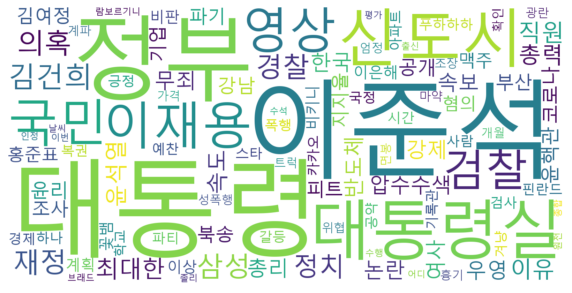

In [9]:
wordcloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_words=100,
    width=1600,
    height=800).generate_from_frequencies(data)


plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()